## Before AlexNet: The Pre-Deep Neural Network ERA

---

- Researchers used to trained machine learning models on CPUs.

- CPUs had limited capacity so were not able to train the large models.
- Training with large datasets was challenging.
- LeNet was one of the first models trained on medium-sized datasets, but not truly large ones.
- Hardware limitations were a major factor in using small datasets with fewer parameters:
  - NVIDIA's GeForce 256 from 1999 could process at most 480 million floating-point operations.
  
  - There were no meaningful programming frameworks like CUDA to operate these accelerators.
  - In contrast, today's accelerators can perform over 1000 TFLOPs per device.
- Activation functions were not as effective.
- Moreover, datasets were still relatively small: OCR on 60,000 low-resolution 28 X 28 pixel images was considered a highly challenging task.
---
## ImageNet 

-  ImageNet was released in 2009, the dataset comprised 12 million images across 22,000 categories.

-------

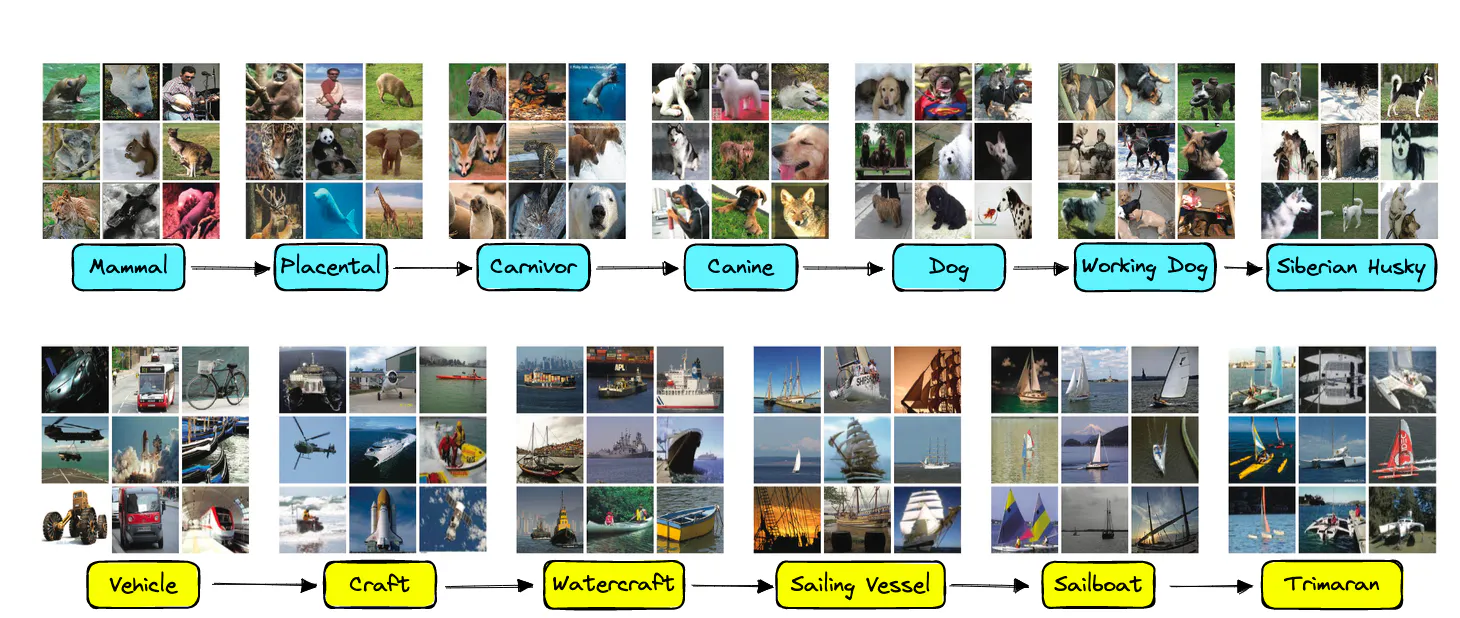

-------


- The team which created the ImageNet Datasets started organising the ImageNet Large Scale Visual Recognition Challenge (ILSVRC).

- The team with lowest error rate will win.
- The ImageNet Challenge becomes popular among the reasechers and become the standard to evaluate the performance of the vision models.

---

# AlexNet: The Beginning of the Deep Neural Network ERA

---

- AlexNet had 60 million parameters.

- Training on CPUs was impractical due to the large number of parameters.
- A major breakthrough occurred when Alex Krizhevsky and Ilya Sutskever implemented a deep CNN that could run on GPUs.
- They realized that the computational bottlenecks in CNNs, such as convolutions and matrix multiplications, could be parallelized in hardware.
- Using two NVIDIA GTX 580s with 3GB of memory, each capable of 1.5 TFLOPs, they implemented fast convolutions. Training one model on a single GPU was not possible at the time.
- The two halves of the network would communicate at specific layers to ensure they were not training two separate models.
- AlexNet was released in 2012 and won the ImageNet competition by a large margin in error rate.
- The authors introduced numerous methods to improve the performance of AlexNet.
- This paper completely changed the AI field.

---

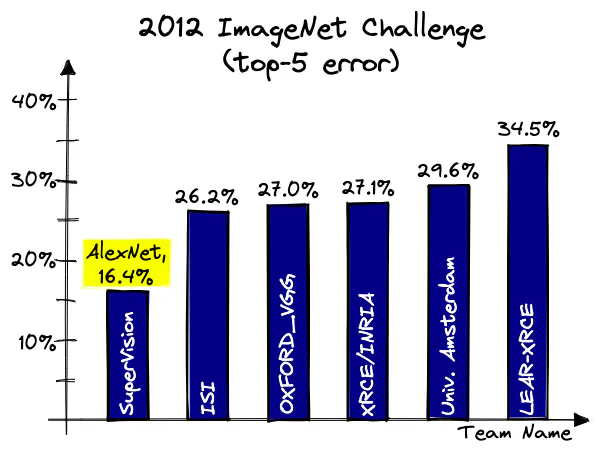

----
## Architecture

**The network consists of 8 learned layers:**
- 5 convolutional layers
- 3 fully-connected layers
---
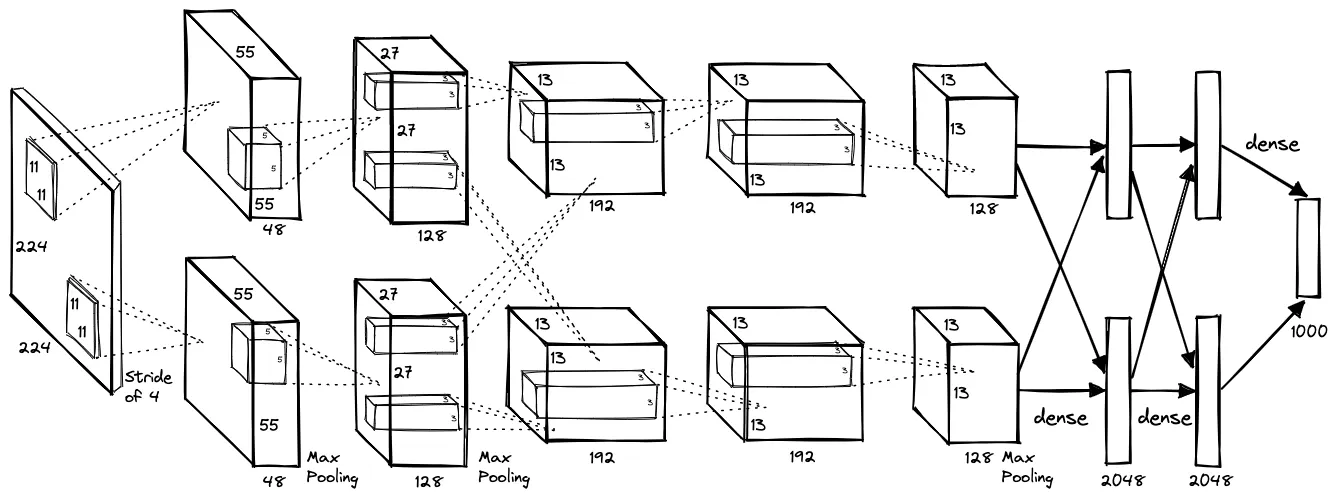

---
### ReLU Nonlinearity

- Used f(x) = max(0, x) as the activation function.

- Trains several times faster than tanh units.
- Does not require input normalization to prevent saturation.
---
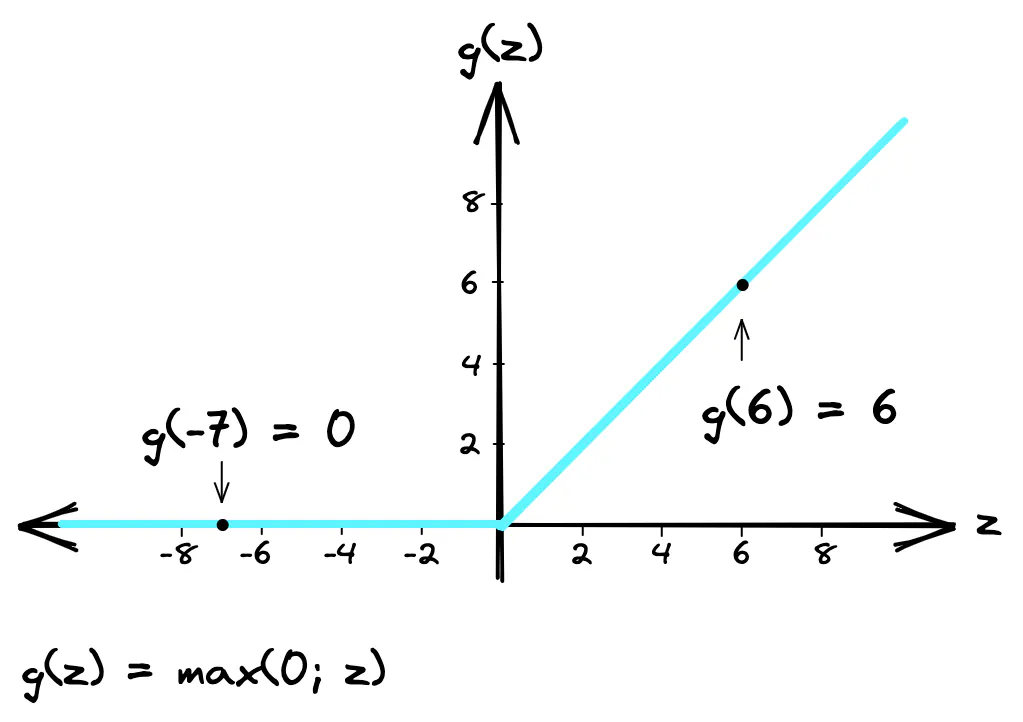

---

### Local Response Normalization

- Applied after the ReLU activation in certain layers (specifically after the first and second convolutional layers in AlexNet).

- By normalizing the responses, it prevents a single feature from dominating.


---

### Overlapping Pooling

- Pooling layers summarize outputs of neighboring groups of neurons

- Use overlapping pooling: z > s, where z is the filter size and s is the stride
- Reduces top-1 and top-5 error rates rates by 0.4% and 0.3%. 
---
 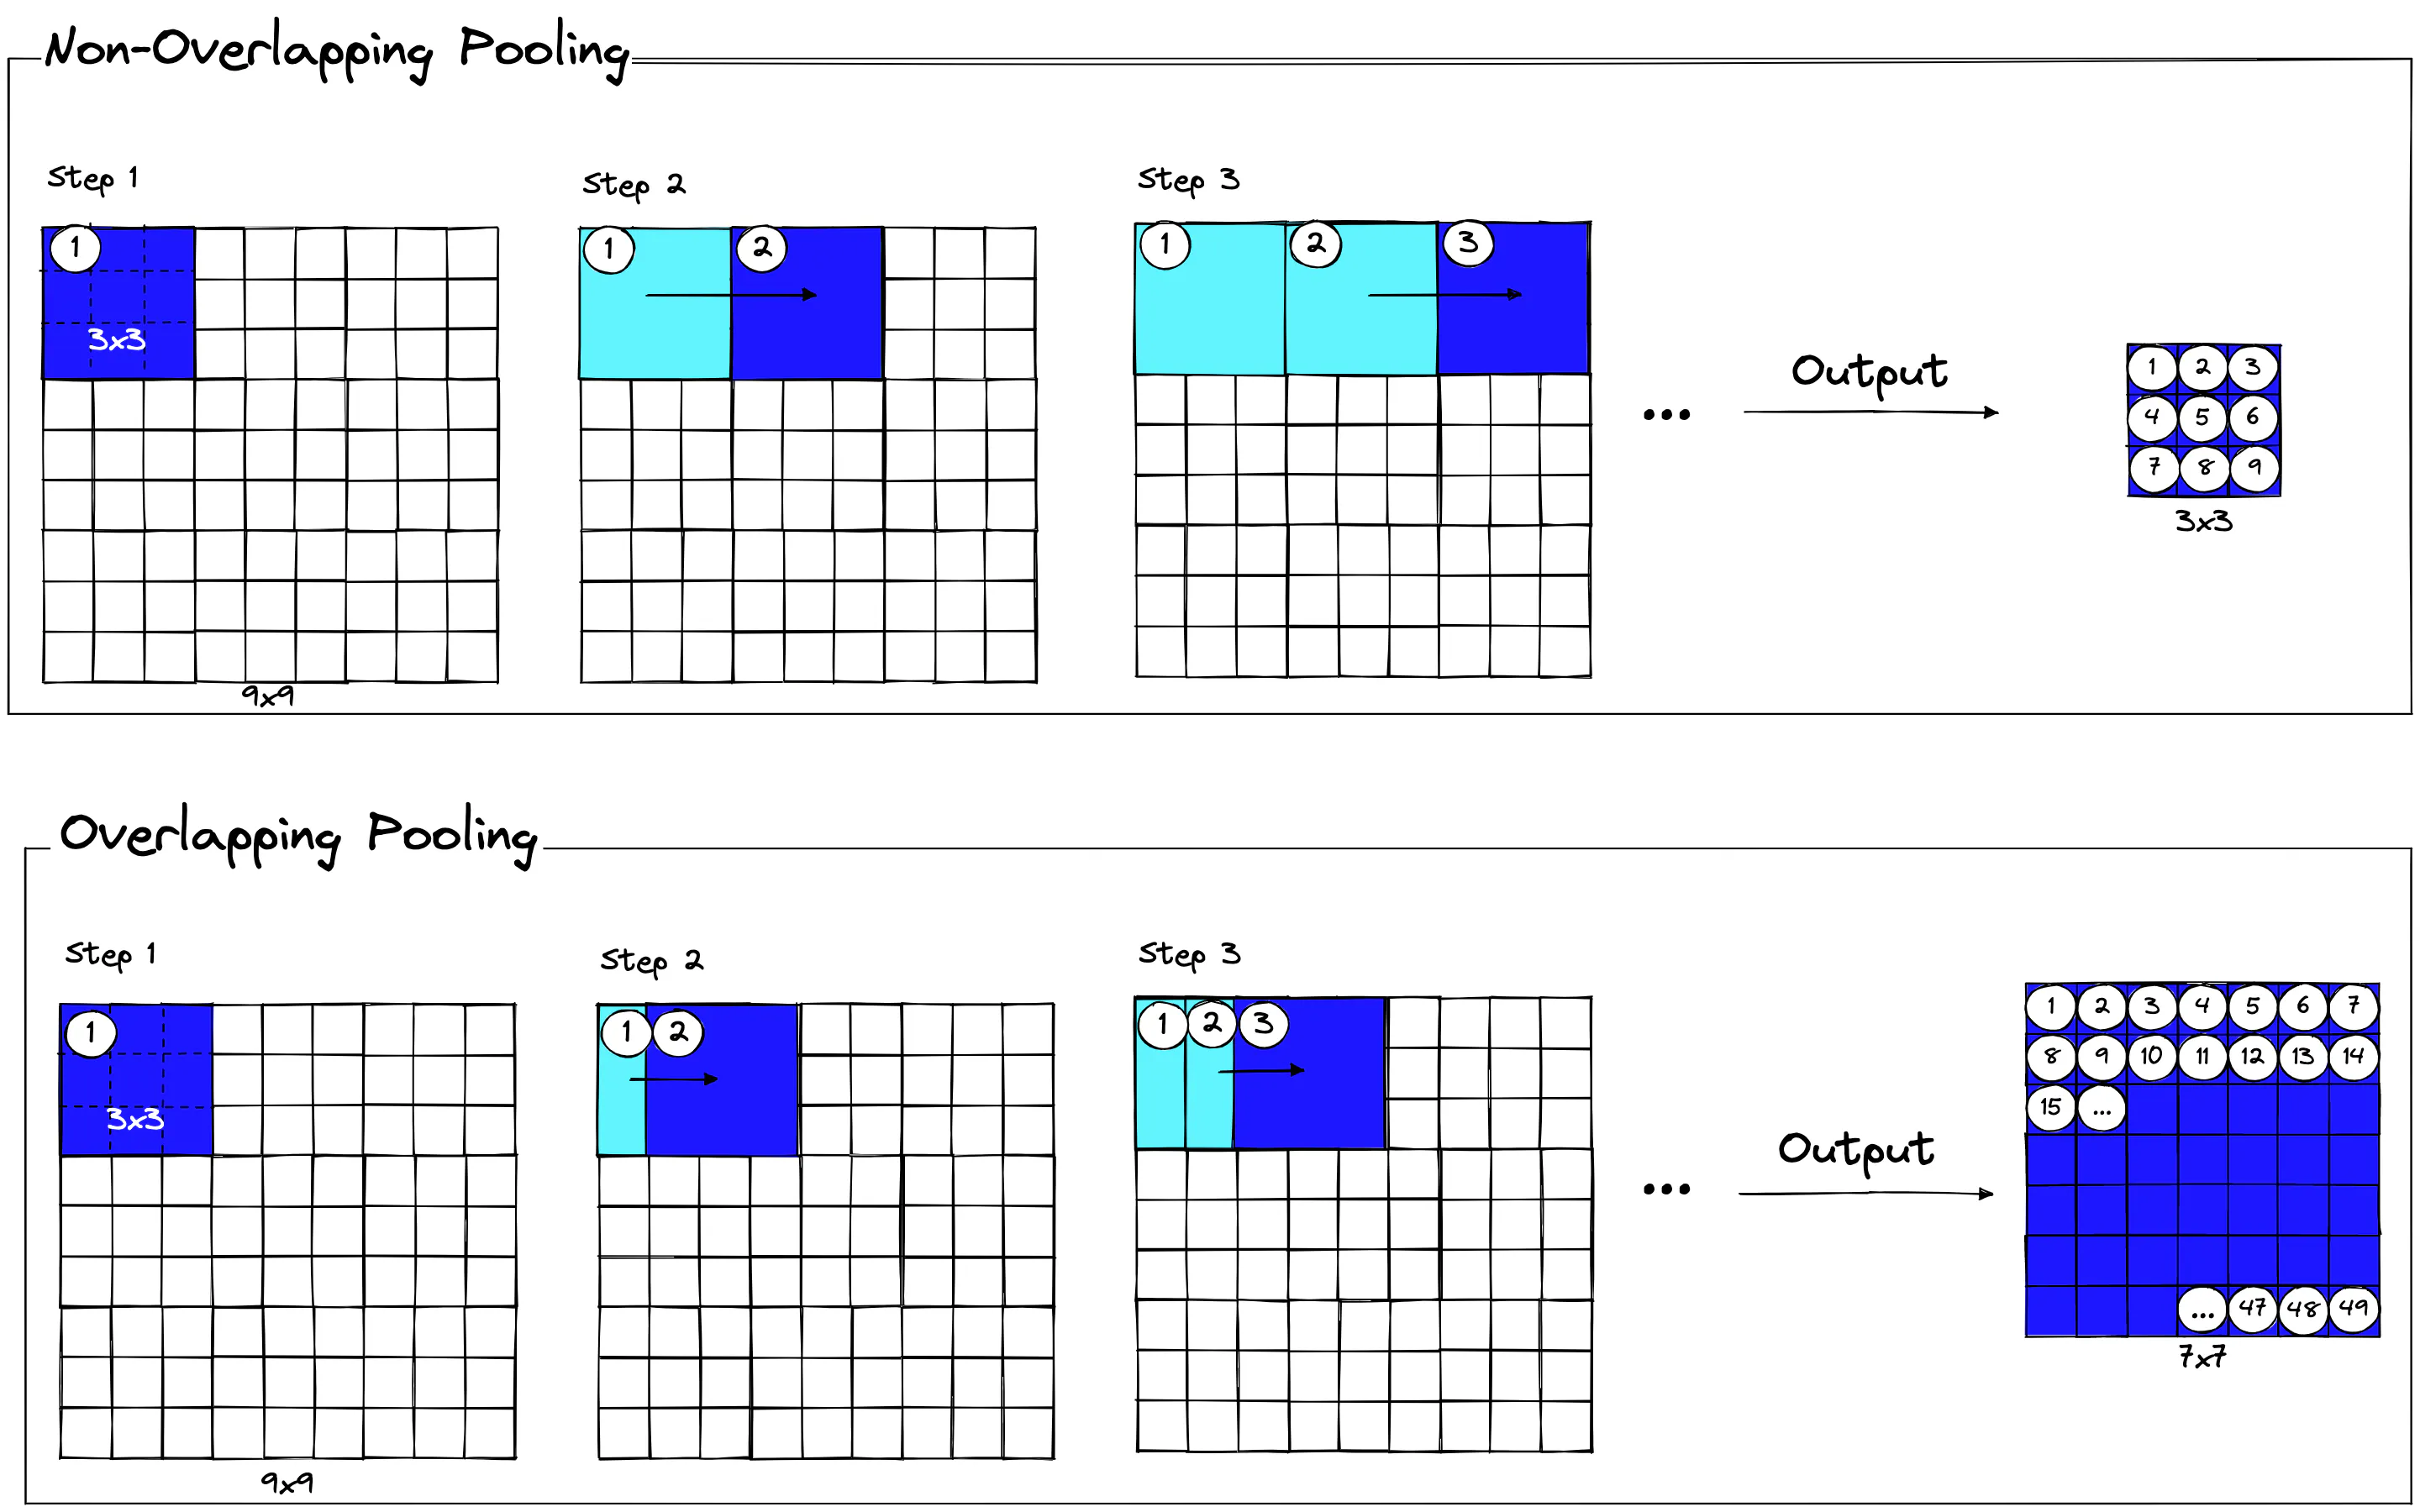
---

## Reducing Overfitting

### Data Augmentation

Two forms of data augmentation were used:

1. Image translations and horizontal reflections
   - Extract random 224x224 patches (and their horizontal reflections) from 256x256 images
   - Increases training set by a factor of 2048

2. Altering RGB channel intensities
   - Performs PCA on RGB pixel values in training set
   - Adds multiples of principal components to each training image

### Dropout

- Randomly drops out neurons during training (probability 0.5)

- Reduces complex co-adaptations of neurons
- Forces the network to learn more robust features
- Used in the first two fully-connected layers
---
 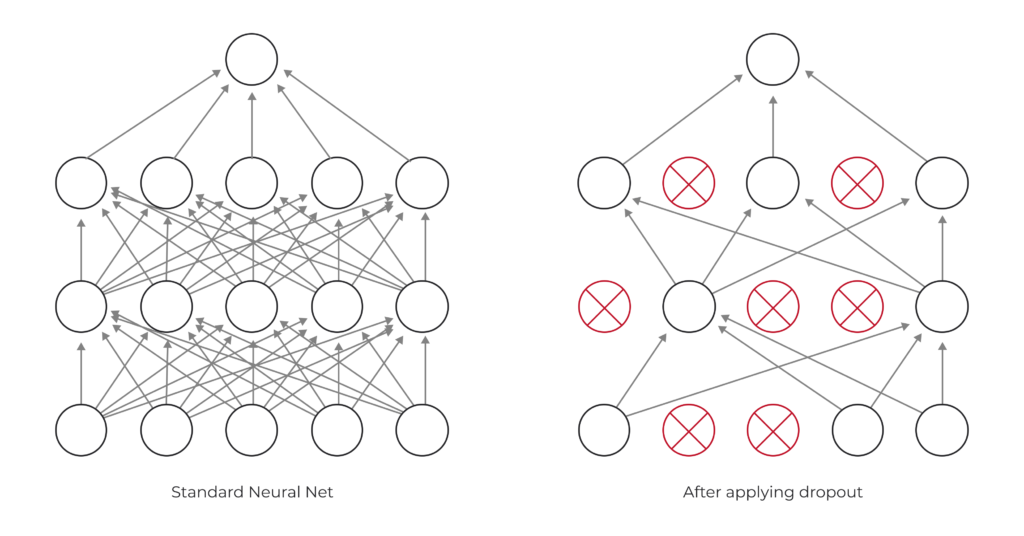

--- 

## GPU Utilization 

- The network was trained using two NVIDIA GTX 580 GPUs

- Each GPU responsible for roughly half of the neurons/kernels
- One GPU handles top half of kernels/neurons and  Other GPU handles bottom half, Reduces training time significantly.

## Training 

- Stochastic gradient descent with batch size of 128

- Momentum of 0.9 and weight decay of 0.0005
- Learning rate initialized at 0.01, reduced by factor of 10 when validation error rate stopped improving
- Trained for approximately 90 epochs through the training set of 1.2 million images and 1000 classes

---

## Extra :

- AlexNet has so many parameters due it is not possible to understand how it learn the features of the images.

- There are some paper that provide visulisation of some layers through guided back brop. [Link2Paper](https://link.springer.com/chapter/10.1007/978-3-319-10590-1_53)

---

## Read more, Learn More and Build more

#### Reding List :

1. ImageNet Classification with Deep Convolutional Neural Networks [Link](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)

2. AlexNet and ImageNet: The Birth of Deep Learning [Link](https://www.pinecone.io/learn/series/image-search/imagenet/)

3. D2L book [Link](https://d2l.ai/chapter_convolutional-modern/alexnet.html)

#### Videos :

1. AlexNet and ImageNet: The Birth of Deep Learning [Link](https://youtu.be/c_u4AHNjOpk?si=htGGLTCF2_ZC3ajO)

2. karapathy at stanford [Link](https://youtu.be/LxfUGhug-iQ?si=9GKdbXGx2HM8ZM1i)

3. karapathy at stanford on localisation [Link](https://youtu.be/GxZrEKZfW2o?si=lyhpjK3MgfeE3PsX)

3. karapathy at stanford about how it learn [Link](https://youtu.be/ta5fdaqDT3M?si=lXgXUZtXj9sgQhKx)


# Alexnet In Work (Code)

In [1]:
# import dataset from HuggingFace
from datasets import load_dataset

imagenet = load_dataset(
    'Maysee/tiny-imagenet',
    split='valid',
    ignore_verifications=True  # set to True if seeing splits Error
)
imagenet

/Users/saurabh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/saurabh/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/saurabh/Library/Python/3.9/lib/python/site-packages/datasets/load.py:2524: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Dataset({
    features: ['image', 'label'],
    num_rows: 10000
})

In [8]:
imagenet[0]  # single record

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,
 'label': 0}

In [9]:
# check image type
type(imagenet[0]['image'])

PIL.JpegImagePlugin.JpegImageFile

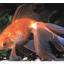

In [10]:
# view PIL images like so (in notebooks):
imagenet[0]['image']

In [11]:
# check for RGB, this image is okay
imagenet[0]['image'].mode

'RGB'

In [12]:
# 'L' is grayscale, and must be converted to RGB
imagenet[201]['image'].mode

'L'

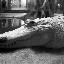

In [13]:
imagenet[201]['image']  # we can see it is grayscale

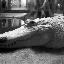

In [14]:
img = imagenet[201]['image'].convert('RGB')
img  # it will still be shown as grayscale

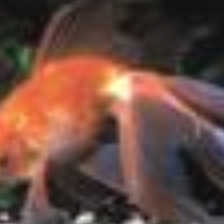

In [15]:
from torchvision import transforms

# resize and crop to 224x224
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224)
])

new_img = preprocess(imagenet[0]['image'])
new_img

In [16]:
# resize and crop to 224x224
preprocess = transforms.Compose([
    transforms.ToTensor(),  # convert from PIL image to tensor before norm to avoid error
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# final result is normalized tensor of shape (3, 224, 224)
new_img = preprocess(new_img)

In [17]:
from tqdm.auto import tqdm
import torch

# define preprocessing pipeline
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

inputs = []

for image in tqdm(imagenet[:50]['image']):
    # convert from grayscale to RBG
    if image.mode != 'RGB':
        image = image.convert("RGB")
    # prepocessing
    input_tensor = preprocess(image)
    inputs.append(input_tensor)

# convert batch list to tensor (as expected by the model)
inputs = torch.stack(inputs)
inputs.size()

100%|██████████| 50/50 [00:00<00:00, 577.05it/s]


torch.Size([50, 3, 224, 224])

In [18]:
import torch

# load pretrained alexnet from pytorch hub
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()  # set model to evaluation mode (for inference)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /Users/saurabh/.cache/torch/hub/v0.10.0.zip
/Users/saurabh/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/saurabh/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /Users/saurabh/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:53<00:00, 4.57MB/s] 


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [19]:
# move to device if available
device = torch.device(
    'cuda' if torch.cuda.is_available() else (
        'mps' if torch.backends.mps.is_available() else 'cpu'
    )
)

In [20]:
# move inputs and model to device
inputs = inputs.to(device)
model.to(device)

# run the model
with torch.no_grad():
    output = model(inputs).detach()
print(output.shape)
output

torch.Size([50, 1000])


tensor([[ 8.1108, 14.6574, -0.1506,  ...,  5.8944,  1.3372, -5.4662],
        [ 2.7997,  9.3263,  2.4853,  ..., -1.7907, -0.1574, -1.7162],
        [ 7.3128, 16.8721,  1.3526,  ...,  3.2606,  0.8557, -3.7938],
        ...,
        [ 3.5170, 10.5402, -3.2779,  ...,  1.9780,  0.7336, -1.1573],
        [ 4.2826, 13.0668,  1.2182,  ..., -1.0022,  2.9048, -5.2177],
        [ 4.0053,  8.5588, -2.4859,  ...,  2.4926,  2.2112, -2.7797]],
       device='mps:0')

In [21]:
# prediction
preds = torch.argmax(output, dim=1).cpu().numpy()
print(preds.shape)
preds

(50,)


array([  1,   1,   1,   1, 392,   1, 149,   1, 392,   1,   1,   1, 782,
         1, 392,  73, 392,   1,  29, 973, 392,  73, 995,   1,   1,   1,
         1, 206,   1,   1,   1,   1,   1,   1,   1,   1, 335,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

In [23]:
import requests

res = requests.get("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt")

In [24]:
pred_labels = res.text.split('\n')
print(f"{len(pred_labels)}\n{pred_labels[1]}")

1000
goldfish


In [25]:
sum(preds == 1) / len(preds)

0.72